In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

## Data Cleaning

In [2]:
data = pd.read_csv('datasets/ham-spam/spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [4]:
data = data.rename(index=str, columns={'v1': 'labels', 'v2': 'text'})
data.head()

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [6]:
data['labels'] = encoder.fit_transform(data['labels'])

In [7]:
data.head()

,labels,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#Missing values
data.isnull().sum()

labels    0
text      0
dtype: int64

In [9]:
#Duplicate values
data.duplicated().sum()

403

In [10]:
data = data.drop_duplicates(keep='first')

In [11]:
data.shape

(5169, 2)

## EDA

In [12]:
data['labels'].value_counts() #imbalanced data

0    4516
1     653
Name: labels, dtype: int64

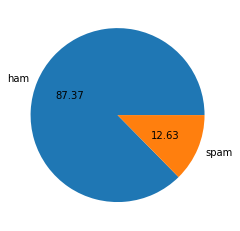

In [13]:
#Pie-chART

import matplotlib.pyplot as plt

plt.pie(data['labels'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [14]:
import nltk #natural language toolkit

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AB15\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
data['num_char'] = data['text'].apply(len)

In [16]:
data.head()

,labels,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
data['num_words'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [18]:
data.head()

,labels,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [19]:
data['num_sent'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [20]:
data.head()

,labels,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
data[['num_char', 'num_words', 'num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [22]:
data[data['labels'] == 0][['num_char', 'num_words', 'num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [23]:
data[data['labels'] == 1][['num_char', 'num_words', 'num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [24]:
import seaborn as sns

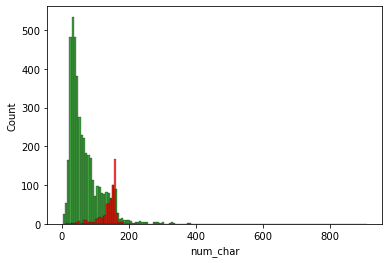

In [25]:
sns.histplot(data[data['labels'] == 0]['num_char'], color='green')
sns.histplot(data[data['labels'] == 1]['num_char'], color='red')

plt.show()

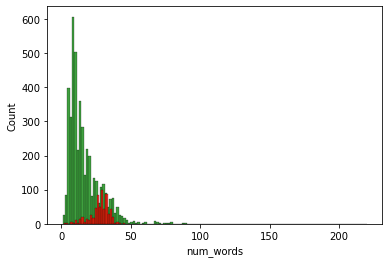

In [26]:
sns.histplot(data[data['labels'] == 0]['num_words'], color='green')
sns.histplot(data[data['labels'] == 1]['num_words'], color='red')

plt.show()

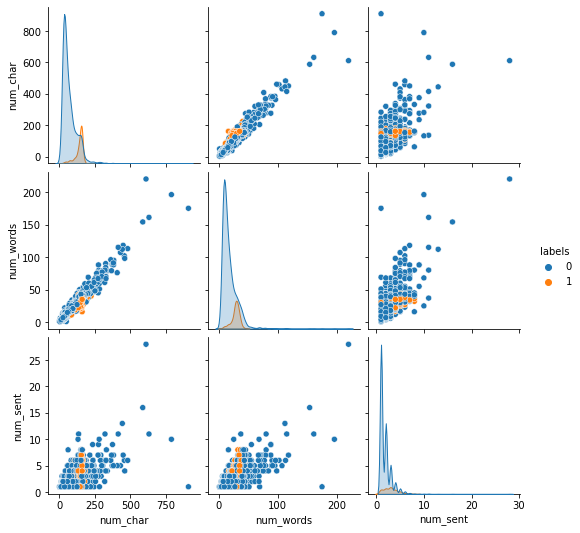

In [27]:
sns.pairplot(data, hue='labels')
plt.show()

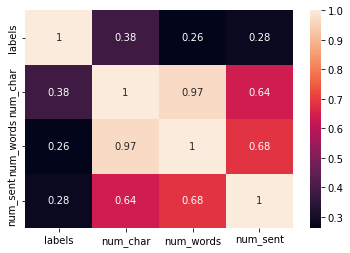

In [28]:
sns.heatmap(data.corr(), annot=True)
plt.show()

## Data Preprocessing

* Lower case
* Tokenisation
* Removing special characters
* Removing stopwords and punctuations
* Stemming

(Could not follow one in course as PyTorch has deprecated certain functions)

In [29]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AB15\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
def transform_text(text):
    
    text = text.lower() #lower case
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [31]:
transform_text('Hi! What are you doing? i am watching videos on youtube. Love, Andy <3')

'hi watch video youtub love andi 3'

In [32]:
data['transformed_text'] = data['text'].apply(transform_text)

In [33]:
data.head()

,labels,text,num_char,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [34]:
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='black')

In [35]:
spam_wc = wc.generate(data[data['labels'] == 1]['transformed_text'].str.cat(sep=" "))

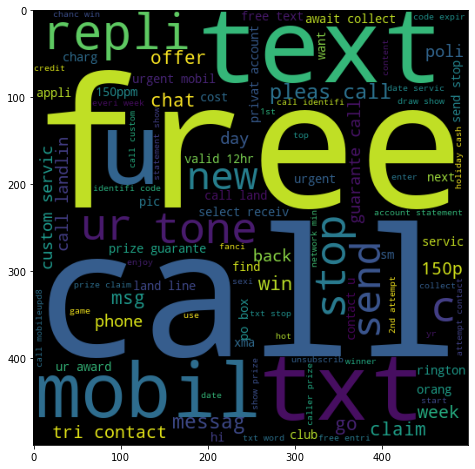

In [36]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)
plt.show()

In [37]:
ham_wc = wc.generate(data[data['labels'] == 0]['transformed_text'].str.cat(sep=" "))

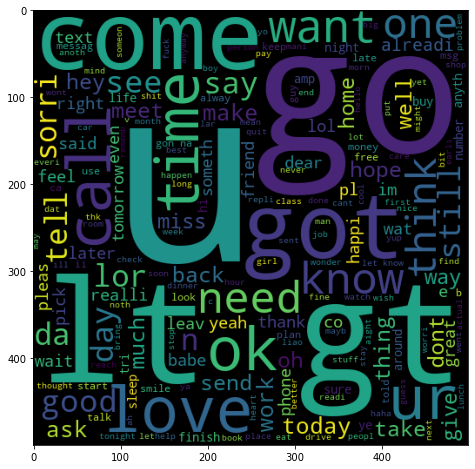

In [38]:
plt.figure(figsize=(15,8))
plt.imshow(ham_wc)
plt.show()

In [39]:
from collections import Counter

C:\Users\AB15\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


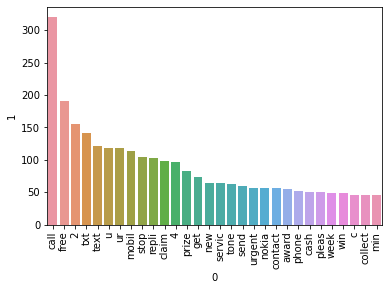

In [40]:
spam_corpus = []
for txt in data[data['labels'] == 1]['transformed_text'].tolist():
    for word in txt.split():
        spam_corpus.append(word)
        
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
            pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\AB15\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


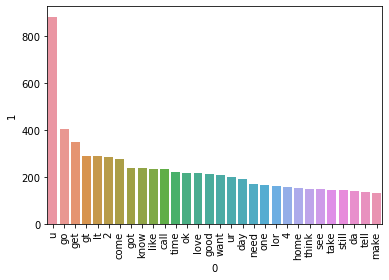

In [41]:
ham_corpus = []
for txt in data[data['labels'] == 0]['transformed_text'].tolist():
    for word in txt.split():
        ham_corpus.append(word)
        
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
            pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [42]:
#Text Vectorisation - Bag of Words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [43]:
#X = cv.fit_transform(data['transformed_text']).toarray()

In [44]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [45]:
X.shape

(5169, 6708)

In [46]:
Y = data['labels'].values

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [48]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [50]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [51]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8636363636363636
[[772 117]
 [ 24 121]]
0.5084033613445378


In [52]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9613152804642167
[[888   1]
 [ 39 106]]
0.9906542056074766


In [53]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542


TF-IDF and MNB performs well

## Model Improvement

In [54]:
#Changing max_features parameter of TF-IDF
tfidf = TfidfVectorizer(max_features=3000)

In [55]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [56]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [57]:
#Using the num_char column along with input text
#import numpy as np

# X = np.hstack((X, data['num_char'].values.reshape(-1,1)))

In [58]:
Y = data['labels'].values

In [59]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [60]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [61]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8607350096711799
[[769 120]
 [ 24 121]]
0.5020746887966805


In [62]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9729206963249516
[[888   1]
 [ 27 118]]
0.9915966386554622


In [63]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9729206963249516
[[884   5]
 [ 23 122]]
0.9606299212598425


In [64]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))